**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo

---


Analista de dados: 
Daniel Campos da Silva

---

Engenheiro de conhecimento: 
Isabela Felix França

---


## Formando a tabela de dados

In [1]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()

In [ ]:
# Testa se upload foi feito com sucesso
!ls

kaggle.json  sample_data


In [ ]:
# Move arquivo para a uma pasta e dá permissões ao sistema
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Fazendo download do dataset
! kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 3.90MB/s]


In [ ]:
# Conferindo o download
!ls

heart-failure-clinical-data.zip  kaggle.json  sample_data


## Transferindo os dados para planilha

In [ ]:
import zipfile
import pandas as pd
 
# Cria dataframe do pandas a partir do zip
dados_pacientes = pd.read_csv('heart-failure-clinical-data.zip',compression='zip')

# Exibindo o começo do dataframe
dados_pacientes

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
dados_pacientes.columns.to_list()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [ ]:
#Normalizandos os dados
from sklearn import preprocessing

aux = dados_pacientes.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
aux_scaled = min_max_scaler.fit_transform(aux)
dados_pacientes = pd.DataFrame(aux_scaled, columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'])
dados_pacientes

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206,0.0


## Tratando os dados

In [ ]:
# Selecionando 90% da base para o modelo e equilibrando as classes
dados_pacientes_obito = dados_pacientes[dados_pacientes.DEATH_EVENT == 1]
dados_pacientes_vivo = dados_pacientes[dados_pacientes.DEATH_EVENT == 0]

quantidade = min(dados_pacientes_obito.shape[0], dados_pacientes_vivo.shape[0]) * 0.9

dados_paciente_obito = dados_pacientes_obito.sample(n = int(quantidade))
dados_paciente_vivo = dados_pacientes_vivo.sample(n = int(quantidade))

# Juntando a base de dados
frames = [dados_paciente_obito, dados_paciente_vivo]
dados_modelo  = pd.concat(frames)

dados_modelo

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
82,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,10,1
187,60.0,0,1896,1,25,0,365000.0,2.1,144,0,0,172,1
93,60.0,1,154,0,25,0,210000.0,1.7,135,1,0,82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0
106,55.0,0,748,0,45,0,263000.0,1.3,137,1,0,88,0
180,40.0,0,478,1,30,0,303000.0,0.9,136,1,0,148,0


## Implementando soluções de redes bayesianas

In [ ]:
# Bibliotecas

from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# Separação dos dados

Y = dados_modelo['DEATH_EVENT']
X = dados_modelo.drop(['DEATH_EVENT'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.5, random_state=0)

### Distribuição Normal

In [ ]:
modelo = GaussianNB()
modelo.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Testando overfit não normalizados
print('Acurácia Treinamento: {}'.format(modelo.score(X_train, Y_train)))
print('Acurácia Teste: {}'.format(modelo.score(X_test, Y_test)))

Acurácia Treinamento: 0.8023255813953488
Acurácia Teste: 0.6744186046511628


In [ ]:
# Testando overfit normalizados
print('Acurácia Treinamento: {}'.format(modelo.score(X_train, Y_train)))
print('Acurácia Teste: {}'.format(modelo.score(X_test, Y_test)))

Acurácia Treinamento: 0.872093023255814
Acurácia Teste: 0.7790697674418605


In [ ]:
#Não normalizados
y_pred_gnb = modelo.predict(X_test)
print("Número de pontos rotulados incorretamente de um total {}: {}".format(X_test.shape[0], (Y_test != y_pred_gnb).sum()))

Número de pontos rotulados incorretamente de um total 86: 28


In [ ]:
#Normalizados
y_pred_gnb = modelo.predict(X_test)
print("Número de pontos rotulados incorretamente de um total {}: {}".format(X_test.shape[0], (Y_test != y_pred_gnb).sum()))

Número de pontos rotulados incorretamente de um total 86: 19


In [ ]:
# Não normalizados
print("Accuracy score : {}".format(metrics.accuracy_score(Y_test, y_pred_gnb)))
print("Recall score : {}".format(metrics.recall_score(Y_test, y_pred_gnb, average='binary')))
print("Precision score : {}".format(metrics.precision_score(Y_test, y_pred_gnb, average='binary')))
print("F1 score : {}".format(metrics.f1_score(Y_test, y_pred_gnb, average='binary')))

Accuracy score : 0.6744186046511628
Recall score : 0.5813953488372093
Precision score : 0.7142857142857143
F1 score : 0.6410256410256411


In [ ]:
#Normalizados
print("Accuracy score : {}".format(metrics.accuracy_score(Y_test, y_pred_gnb)))
print("Recall score : {}".format(metrics.recall_score(Y_test, y_pred_gnb, average='binary')))
print("Precision score : {}".format(metrics.precision_score(Y_test, y_pred_gnb, average='binary')))
print("F1 score : {}".format(metrics.f1_score(Y_test, y_pred_gnb, average='binary')))

Accuracy score : 0.7790697674418605
Recall score : 0.7674418604651163
Precision score : 0.7857142857142857
F1 score : 0.7764705882352941


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


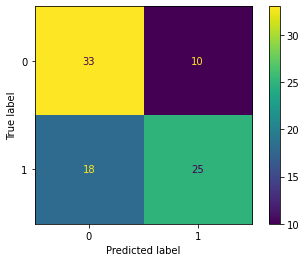

In [ ]:
#Não normalizado
metrics.plot_confusion_matrix(modelo, X_test, Y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


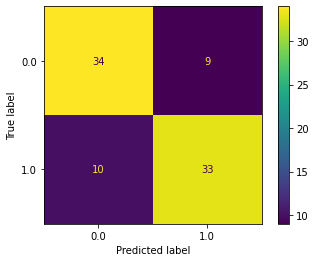

In [ ]:
#Normalizados
metrics.plot_confusion_matrix(modelo, X_test, Y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


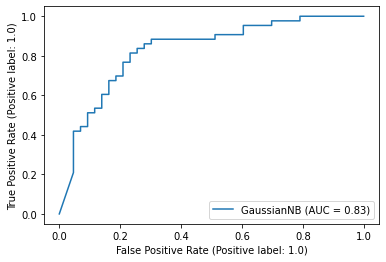

In [ ]:
# Normalizados
metrics.plot_roc_curve(modelo, X_test, Y_test) 
plt.show()

In [ ]:
scores = cross_val_score(modelo, X_test, Y_test, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.88888889 0.55555556 0.66666667 0.66666667 0.77777778 0.66666667
 0.75       0.75       0.5        0.875     ]


In [ ]:
print('Média cross-validation score para Teste: {:.4f}'.format(scores.mean()))

Média cross-validation score para Teste: 0.7097


In [ ]:
scores = cross_val_score(modelo, X_train, Y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.88888889 0.66666667 0.66666667 0.77777778 0.66666667 1.
 1.         0.875      0.875      1.        ]


In [ ]:
print('Média cross-validation score para Treinamento: {:.4f}'.format(scores.mean()))

Média cross-validation score para Treinamento: 0.8417


In [ ]:
#Não normalizados
scores = cross_val_score(modelo, X_train, Y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Média cross-validation score para Treinamento: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.55555556 0.88888889 0.77777778 0.88888889 0.88888889 0.77777778
 0.75       0.375      0.75       1.        ]
Média cross-validation score para Treinamento: 0.7653


### Distribuição Multinomial

In [ ]:
modelo = MultinomialNB()
modelo.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
print('Acurácia Treinamento: {}'.format(modelo.score(X_train, Y_train)))

Acurácia Treinamento: 0.7209302325581395


In [ ]:
y_pred_mnb = modelo.predict(X_test)
print("Número de pontos rotulados incorretamente de um total {}: {}".format(X_test.shape[0], (Y_test != y_pred_gnb).sum()))

Número de pontos rotulados incorretamente de um total 86: 19


In [ ]:
print("Accuracy score : {}".format(metrics.accuracy_score(Y_test, y_pred_mnb)))
print("Recall score : {}".format(metrics.recall_score(Y_test, y_pred_mnb, average='micro')))
print("Precision score : {}".format(metrics.precision_score(Y_test, y_pred_mnb, average='micro')))
print("F1 score : {}".format(metrics.f1_score(Y_test, y_pred_mnb, average='micro')))

Accuracy score : 0.6511627906976745
Recall score : 0.6511627906976745
Precision score : 0.6511627906976745
F1 score : 0.6511627906976745


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


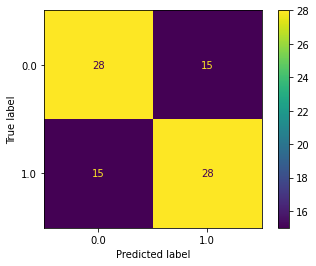

In [ ]:
metrics.plot_confusion_matrix(modelo, X_test, Y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


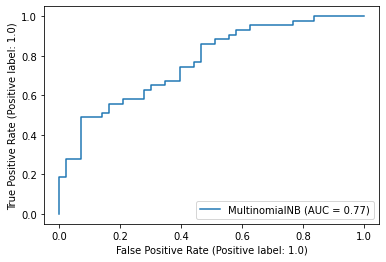

In [ ]:
metrics.plot_roc_curve(modelo, X_test, Y_test) 
plt.show()

### Adaptação do algoritmo padrão multinomial

In [ ]:
modelo = ComplementNB()
modelo.fit(X_train, Y_train)

ComplementNB()

In [ ]:
print('Acurácia Treinamento: {}'.format(modelo.score(X_train, Y_train)))

Acurácia Treinamento: 0.7209302325581395


In [ ]:
y_pred_cnb = modelo.predict(X_test)
print("Número de pontos rotulados incorretamente de um total {}: {}".format(X_test.shape[0], (Y_test != y_pred_cnb).sum()))

Número de pontos rotulados incorretamente de um total 86: 30


In [ ]:
print("Accuracy score : {}".format(metrics.accuracy_score(Y_test, y_pred_cnb)))
print("Recall score : {}".format(metrics.recall_score(Y_test, y_pred_cnb, average='micro')))
print("Precision score : {}".format(metrics.precision_score(Y_test, y_pred_cnb, average='micro')))
print("F1 score : {}".format(metrics.f1_score(Y_test, y_pred_cnb, average='micro')))

Accuracy score : 0.6511627906976745
Recall score : 0.6511627906976745
Precision score : 0.6511627906976745
F1 score : 0.6511627906976745


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


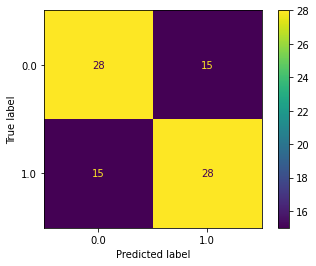

In [ ]:
metrics.plot_confusion_matrix(modelo, X_test, Y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


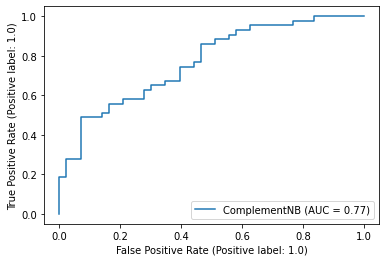

In [ ]:
metrics.plot_roc_curve(modelo, X_test, Y_test) 
plt.show()

### Distribuição de Bernoulli

In [ ]:
modelo = BernoulliNB()
modelo.fit(X_train, Y_train)

BernoulliNB()

In [ ]:
print('Acurácia Treinamento: {}'.format(modelo.score(X_train, Y_train)))

Acurácia Treinamento: 0.6162790697674418


In [ ]:
y_pred_bnb = modelo.predict(X_test)
print("Número de pontos rotulados incorretamente de um total {}: {}".format(X_test.shape[0], (Y_test != y_pred_bnb).sum()))

Número de pontos rotulados incorretamente de um total 86: 36


In [ ]:
print("Accuracy score : {}".format(metrics.accuracy_score(Y_test, y_pred_bnb)))
print("Recall score : {}".format(metrics.recall_score(Y_test, y_pred_bnb, average='micro')))
print("Precision score : {}".format(metrics.precision_score(Y_test, y_pred_bnb, average='micro')))
print("F1 score : {}".format(metrics.f1_score(Y_test, y_pred_bnb, average='micro')))

Accuracy score : 0.5813953488372093
Recall score : 0.5813953488372093
Precision score : 0.5813953488372093
F1 score : 0.5813953488372093


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


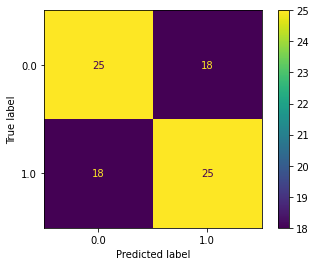

In [ ]:
metrics.plot_confusion_matrix(modelo, X_test, Y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


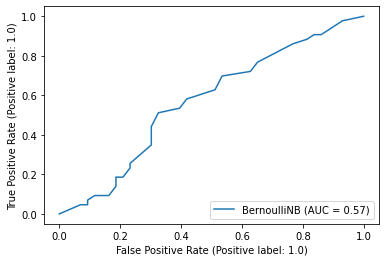

In [ ]:
metrics.plot_roc_curve(modelo, X_test, Y_test) 
plt.show()

## Resultados

Apesar dos tipo de algorítimo ideal para os dados, quis trazer os outros tipos de Naive Bayes para que pudessémos identificar melhor o que uma configuração não adequada para um determinado tipo de dados pode trazer para o desempenho do modelo. Os resultados podem ser vistos no decorrer deste, assim como na imagem abaixo.

Para resultado do Gaussian Naive Bayes, configuração escolhida, temos 78% de acurácia, 81% de recall, 76% de precision e F1 de 79%.

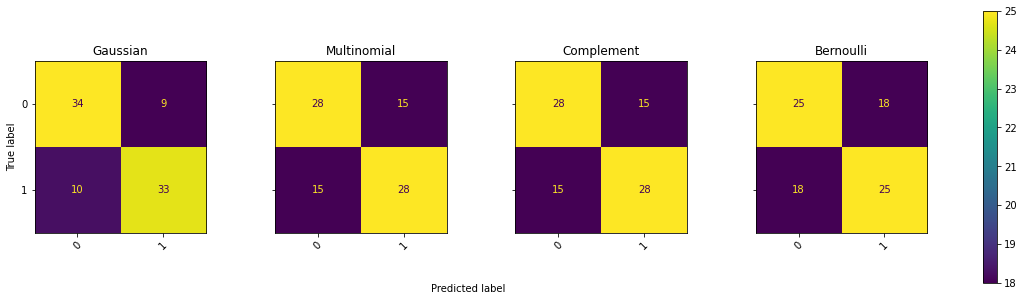

In [ ]:
classifiers = {
    "Gaussian": GaussianNB(),
    "Multinomial": MultinomialNB(),
    "Complement": ComplementNB(),
    "Bernoulli": BernoulliNB()
}

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, Y_train).predict(X_test)
    cf_matrix = metrics.confusion_matrix(Y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['0', '1'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()